# Synergy H1

Synergy H1 is an Agilent BioTek microplate reader that can read absorbance, fluorescence, and luminescence. Please refer to the [user guide](https://cqls.oregonstate.edu/sites/cqls.oregonstate.edu/files/synergy_h1_user_manual_sd-xb000426.pdf) for installation instructions.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
from pylabrobot.plate_reading import PlateReader
from pylabrobot.plate_reading import SynergyH1Backend

In [ ]:
pr = PlateReader(name="PR", size_x=0,size_y=0,size_z=0, backend=SynergyH1Backend())
await pr.setup()

In [5]:
await pr.backend.get_firmware_version()

'1320200  Version 2.07'

In [ ]:
await pr.open()

Before closing, assign a plate to the plate reader. This determines the spacing of the loading tray in the machine, as well as the positioning of wells where spectrophotometric measurements and pictures will be taken.

In [8]:
from pylabrobot.resources import CellVis_24_wellplate_3600uL_Fb
plate = CellVis_24_wellplate_3600uL_Fb(name="plate")
pr.assign_child_resource(plate)

In [ ]:
await pr.close()

## Plate reading

Note: these measurements were taken with a 96 well plate.

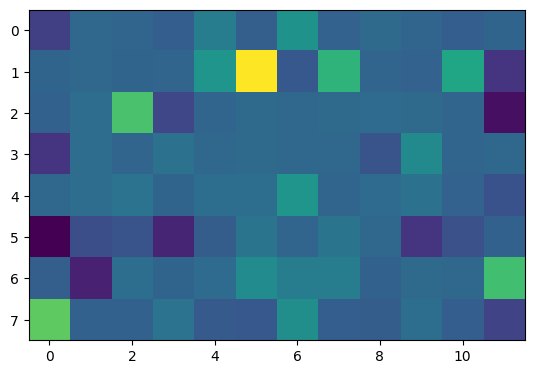

In [10]:
data = await pr.read_absorbance(wavelength=434)
plt.imshow(data)

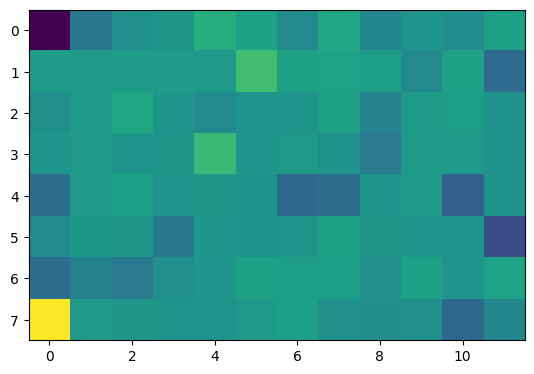

In [11]:
data = await pr.read_fluorescence(
  excitation_wavelength=485, emission_wavelength=528, focal_height=7.5
)
plt.imshow(data)

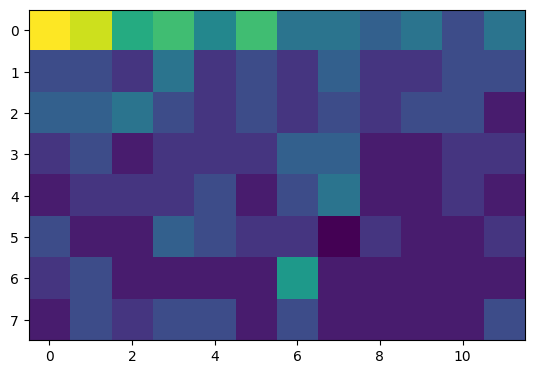

In [12]:
data = await pr.read_luminescence(focal_height=4.5)
plt.imshow(data)

## Shaking

In [ ]:
await pr.backend.shake(
  shake_type=SynergyH1Backend.ShakeType.LINEAR,
  frequency=4  # linear frequency in mm, 1 <= frequency <= 6
)

In [11]:
await pr.backend.stop_shaking()

## Heating

Synergy H1 supports heating but does not support active cooling.

In [ ]:
await pr.backend.set_temperature(temperature=37) # Temperature in degrees C

In [ ]:
await pr.backend.get_current_temperature() # Returns temperature in degrees C

In [ ]:
await pr.backend.stop_heating_or_cooling() # Stop temperature control